In [1]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib

Examining the Data

In [2]:
df=pd.read_csv(r'C:\Users\SYS1\Documents\avocado.csv')#load the dataset

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
np.where(pd.isnull(df))[0]

array([], dtype=int64)

In [5]:
#lets remove the NaN sets
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)

In [6]:
df.shape

(18249, 14)

Dataset contans 18249 rows and 14 columns

In [7]:
df=df.drop(["Unnamed: 0"],axis=1)

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Dataset contains 13 columns

In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Dataset contains all sum will be zeros

Summary Statistis

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The mean is more than median 50%perentage in all columns
There is large difference in 75%percentage and max
The 1 & 2 observation suggest that there are extreme outliers present in three columns

In [14]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Target/dependent variables is discrete and categorial in nature

In [15]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Here year contains categorical values of 2015,2016,2017 & 2018

# Data visualization

<AxesSubplot:xlabel='Date', ylabel='count'>

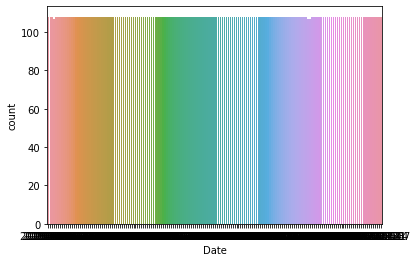

In [16]:
sns.countplot(df['Date'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

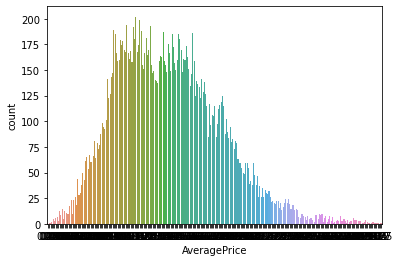

In [17]:
sns.countplot(df['AveragePrice'])

Here Data in not normally distributed in the all columns

<AxesSubplot:xlabel='Total Volume', ylabel='count'>

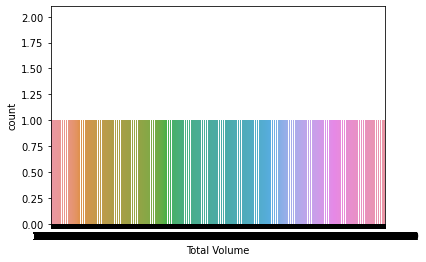

In [18]:
sns.countplot(df['Total Volume'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='4046', ylabel='count'>

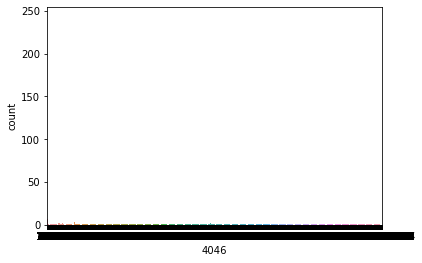

In [19]:
sns.countplot(df['4046'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='type', ylabel='count'>

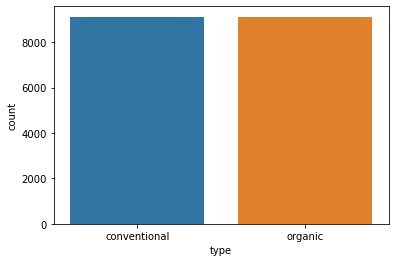

In [20]:
sns.countplot(df['type'])

Here Data is normally distributed in the all columns.

<AxesSubplot:>

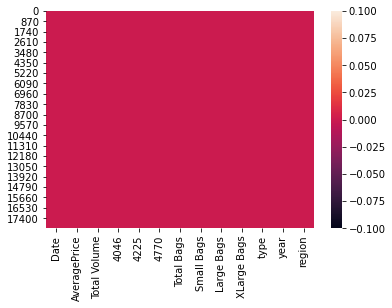

In [21]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [22]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

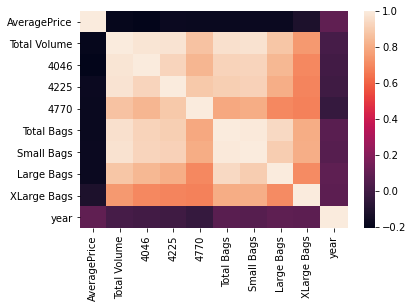

In [23]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolate

<AxesSubplot:>

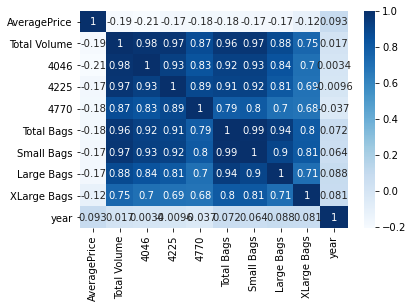

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

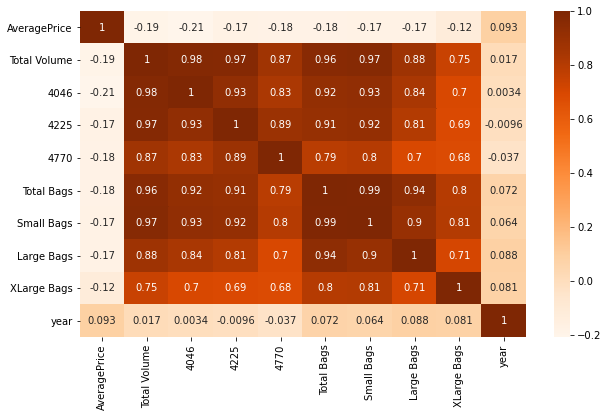

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

year is higly correlated with Xlargebags

xlargebags is highly negatively correlated with smallbags

smallbags is higly positively correlated with averageprice

averageprice is negatively correlated with year

# Plotting Outliers

In [27]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:>

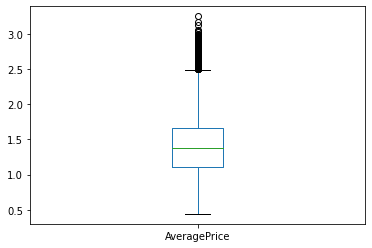

In [28]:
df['AveragePrice'].plot.box()

<AxesSubplot:>

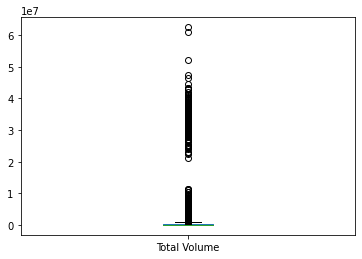

In [29]:
df['Total Volume'].plot.box()

Here Total Volume have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

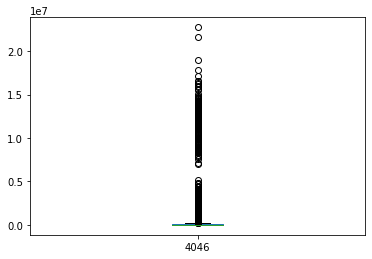

In [30]:
df['4046'].plot.box()

Here 4046 have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

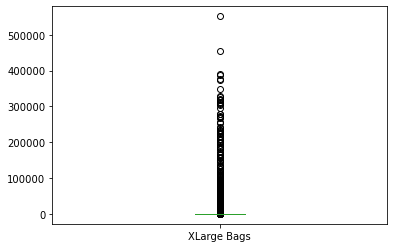

In [31]:
df['XLarge Bags'].plot.box()

Here xlargebags have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

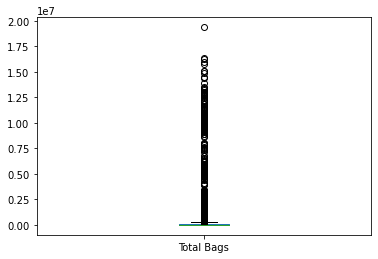

In [32]:
df['Total Bags'].plot.box()

Here Total Bags have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

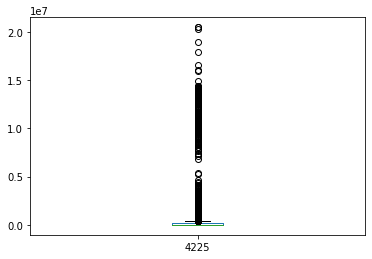

In [33]:
df['4225'].plot.box()

Here 4225 have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

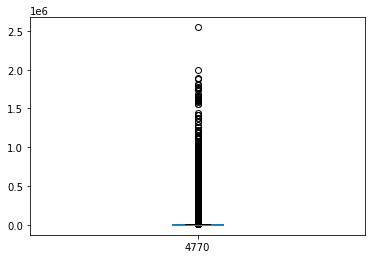

In [34]:
df['4770'].plot.box()

Here 4770 have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

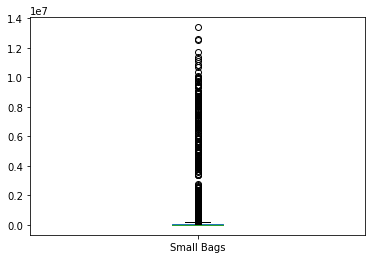

In [36]:
df['Small Bags'].plot.box()

Here small Bags have outside the viscous so we can find here outliers easily.

In [37]:
df.shape

(18249, 13)

Dataset contains 1517 rows and 13 columns

# To check Distribution of skewness

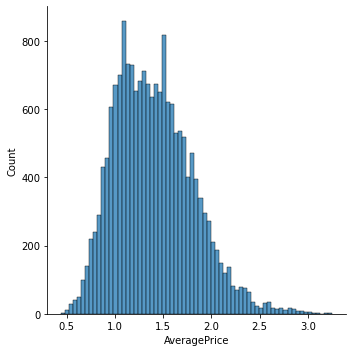

In [38]:
sns.displot(df['AveragePrice'])

Data is not normally distributed in these columns

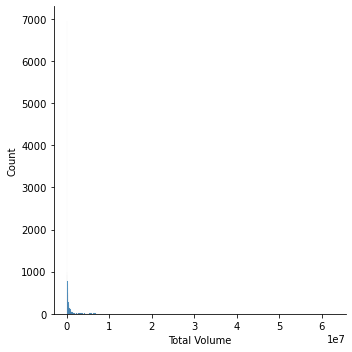

In [39]:
sns.displot(df['Total Volume'])

Data is not normally distributed in these columns

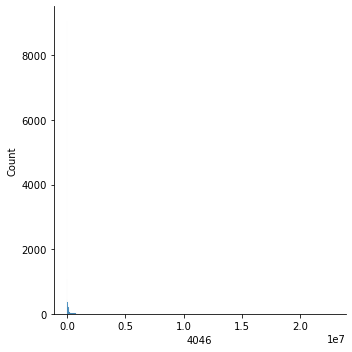

In [40]:
sns.displot(df['4046'])

Data is not normally distributed in these columns

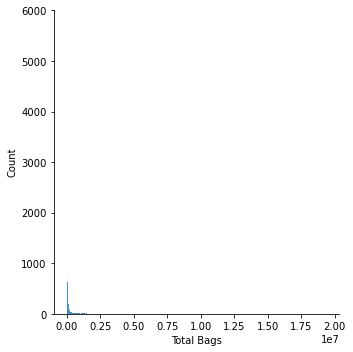

In [41]:
sns.displot(df['Total Bags'])

Data is not normally distributed in these columns

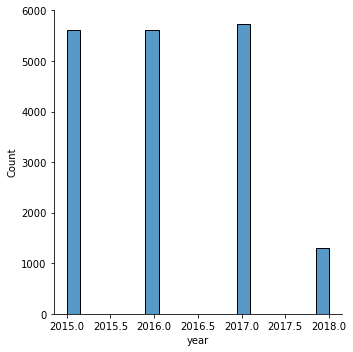

In [42]:
sns.displot(df['year'])

Data is not normally distributed in these columns

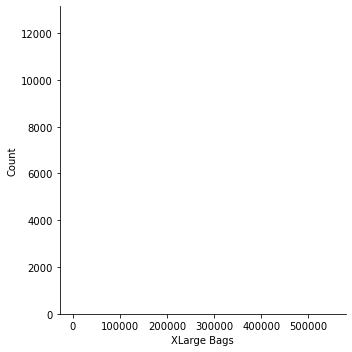

In [43]:
sns.displot(df['XLarge Bags'])

Data is not normally distributed in these columns

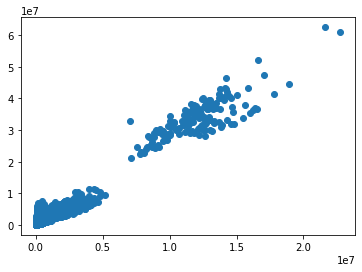

In [44]:
plt.scatter(df['4046'],df['Total Volume'])

sacttering of 4046 and total volume

In [ ]:
sns.pairplot(df)

Remove the missing values.

drop the nagativitycorrelated columns.

remove the outliers.

In [ ]:
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

Here scattering plot of averageprice and total volume

In [ ]:
df.drop('Total Bags',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.columns

# Encoding Method

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['year']=LE.fit_transform(df['year'])

In [53]:
df["year"].unique()

array([0, 1, 2, 3], dtype=int64)

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])

In [55]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])

In [57]:
df["type"].unique()

array([0, 1])

In [58]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [59]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date']=LE.fit_transform(df['Date'])

In [60]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [61]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Removing Outliers

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [64]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,3,53


In [65]:
df.shape

(18249, 12)

In [66]:
df_new.shape

(17651, 12)

# StandardScler Method

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [68]:
scaledX

array([[-0.67635986, -0.18868864, -0.22771641, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.13901962, -0.23042664, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -1.18206895, -0.21208462, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632,  1.15237477, -0.24233073, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877,  1.30138182, -0.24162464, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121,  0.53151208, -0.24125273, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [69]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [70]:
Y.explained_variance_ratio_

array([5.15378722e-01, 1.67735704e-01, 1.22516891e-01, 8.15071172e-02,
       3.35950693e-02, 3.17829509e-02, 2.43867383e-02, 1.08660866e-02,
       5.31377014e-03, 3.92446310e-03, 2.99248753e-03, 1.29253634e-11])

In [71]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 51.53787222,  68.31144261,  80.56313169,  88.71384341,
        92.07335034,  95.25164543,  97.69031926,  98.77692792,
        99.30830494,  99.70075125, 100.        , 100.        ])

In [72]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 8


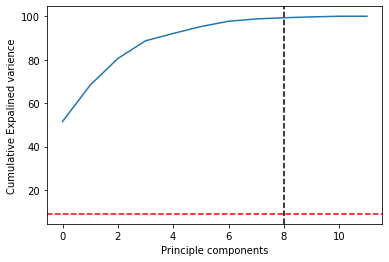

In [73]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

# Data Visualization of Varience

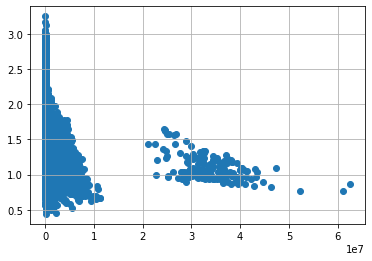

In [74]:
var = 'Total Volume'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of total volume and averageprice

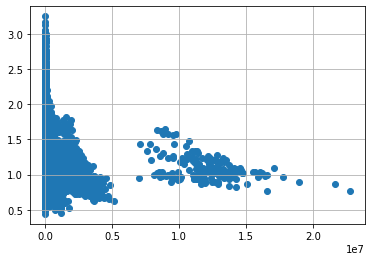

In [75]:
var = '4046'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4046 and aveargeprice

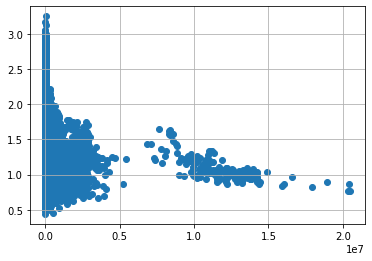

In [76]:
var = '4225'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4225 and aveargeprice

# Missing Value Treatments

In [77]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here dataset contains the sum values will be zeros

In [78]:
df["AveragePrice"]=df["AveragePrice"].fillna(df["AveragePrice"].mean())
df["Total Volume"]=df["Total Volume"].fillna(df["Total Volume"].median())

In [79]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking Skewness

In [80]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Here the dataset contains skewness values

# Model Engineering

In [81]:
x_train=df.drop("AveragePrice",axis=1)
y_train=df["AveragePrice"]

In [82]:
x_train.head()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,50,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,49,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,48,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,47,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [83]:
y_train.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [84]:
x_train.shape

(18249, 11)

Here x_train contains 1517 rows and 11 columns

In [85]:
y_train.shape

(18249,)

Here y_train contains 1517 rows and zero columns

In [86]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Regressor Methods

In [87]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [88]:
x=df.drop(["AveragePrice"],axis=1)
y=df["AveragePrice"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=50, test_size=0.2)

In [89]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.18152248058822937
0.17798137504529427
0.18102016840634919
0.1832751505849001
0.17905535992482385
0.1782453288596197
0.1813851574480827
0.17664041331597463
0.17919829072081095
0.1818899260692561
0.18178001155996146
0.17832462318164788
0.17922978287241534
0.18175175000570692
0.18034069735721794
0.17993727978808127
0.17994854667947388
0.17818145284228182
0.1812515847828685
0.18052814450634588
0.1813819099587221
0.17960397835542477
0.18264232581217912
0.17817953082629737
0.17926134590866571
0.1782328782916036
0.18037274951367596
0.18114945014454564
0.17766159921495822
0.17991771330706666
0.1818961016097429
0.1789042753151176
0.17954173018190597
0.1812651127379188
0.1818478213699199
0.17989883001591725
0.18192682557284864
0.18180721386594823
0.18123359632903654
0.18034798934358534
0.18061424874387697
0.17905689001826683
0.1832332894322546
0.17811593884667615
0.1801223328588672
0.1820467349298804
0.17951174266165615
0.17858968047623228
0.17922710778334722
0.17987179604845954
0.180617054975

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [91]:
y_pred = regressor.predict(x_test)

In [92]:
y_pred

array([1.18, 1.26, 1.67, ..., 0.81, 1.19, 0.64])

In [93]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100

In [94]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

100.0

The Test Accuracy of LogisticRegression is 100

In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [96]:
y_pred = regressor.predict(x_test)
y_pred

array([1.2163, 1.2482, 1.7617, ..., 0.824 , 1.2474, 0.6565])

In [97]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.68

The Test Accuracy of RandomForestRegressor is 98.68

# Cross Value Correction

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.10307607199968576


In [100]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.4140333900072212


In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

-10.309085565016925


# Hyperparameter Tunning

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [104]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [106]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

# Evaluate The Model

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

80.45066903067702


In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

45.11413601905543


In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

91.56948876121199


# Save The Model

In [110]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# prediction Method

In [111]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.2128 1.2329 1.7427 1.6819 1.9676 1.6327 1.6506 1.0674 1.5948 1.5477
 1.1396 0.8711 1.9293 1.1338 1.6272 0.8952 1.9869 1.7963 1.4755 1.6083
 1.133  1.9262 1.8173 1.7147 1.0011 1.5898 0.8766 1.3239 1.0166 2.113
 1.3078 1.0922 1.0259 1.0271 1.3914 1.9646]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [112]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.08861738 1.14620192 1.58777565 1.58469686 1.58348482 1.71526452
 1.66955834 1.22753262 1.72617438 1.27547023 1.26587659 1.05227429
 1.67542508 1.18175762 1.24357573 1.0537274  1.72607797 1.62312926
 1.58528193 1.69130019 1.20541138 1.82065781 1.66024084 1.25407738
 1.15450598 1.6142315  1.08937014 1.09223682 1.12150636 1.67298661
 1.18527466 1.15353495 1.0975474  1.02478704 1.2503751  1.81478547]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


In [113]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.2168 1.2394 1.7594 1.7211 1.9796 1.6329 1.641  1.0676 1.6115 1.5577
 1.1428 0.8768 1.9547 1.0771 1.6107 0.9016 2.009  1.8104 1.4657 1.6157
 1.1182 1.9233 1.8164 1.7204 1.0157 1.5838 0.884  1.3267 1.0392 2.0965
 1.3171 1.0908 1.0367 1.0341 1.4086 1.9779]
[1.21 1.17 1.61 2.01 2.02 1.76 1.61 1.03 1.63 1.53 0.98 0.86 2.1  0.88
 1.74 0.9  1.88 1.75 1.63 1.52 1.08 2.06 1.94 1.76 0.97 1.43 0.88 1.44
 0.8  1.87 1.33 1.08 1.04 1.1  1.53 1.79]


The train and test data is balanced most classification methods hit the 99% accuracy with the datset.